<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/HalloweenCLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('/content/sample_data/monster_train.csv')
df.head()

,id,class,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,1,Zombie,61.624796,green,24.37,25.009,0.153880,3.331372
1,2,Ghost,51.408600,white,3.52,7.211,0.210933,3.314029
2,3,Witch,61.419138,purple,22.78,19.478,0.174245,3.481500
3,4,Zombie,52.970681,green,29.82,23.499,0.169031,3.335083
4,5,Witch,57.270176,purple,27.25,13.082,0.215114,3.041551


In [3]:
# ID SHOULD START FROM 0!!!!!!!!!!!!!!!!!😡
df.drop('id', axis=1, inplace=True)

In [4]:
df.shape

(37497, 7)

In [5]:
df.isnull().sum()

class              0
height             0
color              0
rottingFleshPct    0
bloodCoverage      0
aura               0
hairLength         0
dtype: int64

In [6]:
df['class'].value_counts()

Zombie     14952
Witch       7432
Ghost       5672
Vampire     5667
Mummy       3774
Name: class, dtype: int64

In [7]:
df['color'].value_counts()

green     11351
grey      10548
white      9501
purple     6097
Name: color, dtype: int64

In [8]:
df.describe()

,height,rottingFleshPct,bloodCoverage,aura,hairLength
count,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000
mean,60.479933,20.978922,19.280995,0.197489,3.469250
std,7.755619,10.222874,12.005198,0.084560,0.418789
min,22.124607,1.530000,-2.634000,0.020161,1.943124
25%,56.413659,11.540000,8.598000,0.120640,3.186231
50%,62.041574,22.000000,18.667000,0.195185,3.472094
75%,66.017655,29.500000,28.981000,0.250105,3.751260
max,83.070259,48.770000,58.864000,0.540366,5.388365


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37497 entries, 0 to 37496
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            37497 non-null  object 
 1   height           37497 non-null  float64
 2   color            37497 non-null  object 
 3   rottingFleshPct  37497 non-null  float64
 4   bloodCoverage    37497 non-null  float64
 5   aura             37497 non-null  float64
 6   hairLength       37497 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.0+ MB


# **🎃PL🕸TTING🎃**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
warnings.filterwarnings('ignore')

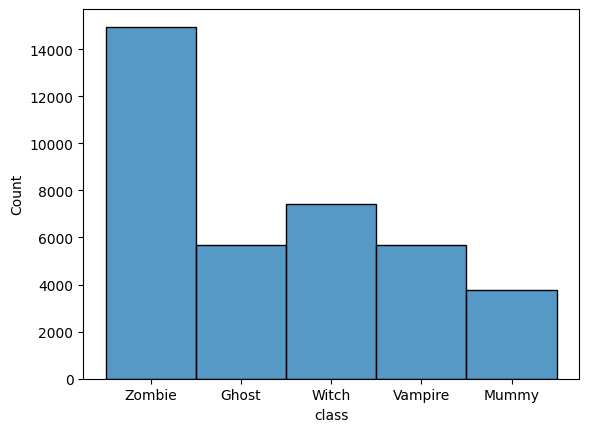

In [12]:
sns.histplot(data=df, x='class');

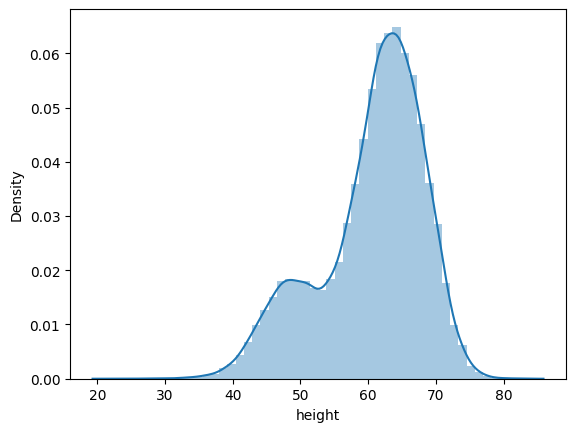

In [13]:
sns.distplot(df['height']);

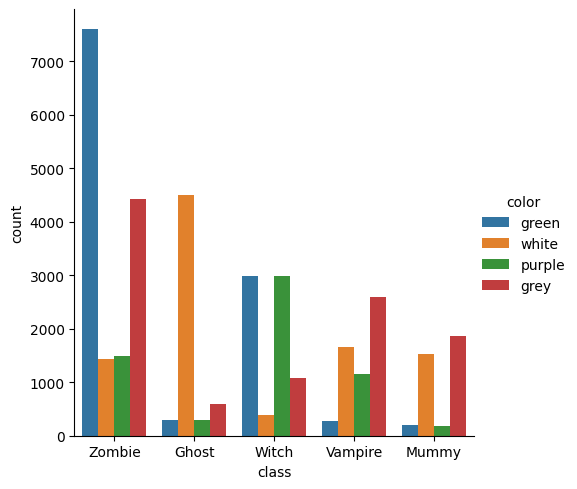

In [14]:
sns.catplot(data=df, x='class', hue='color', kind='count')

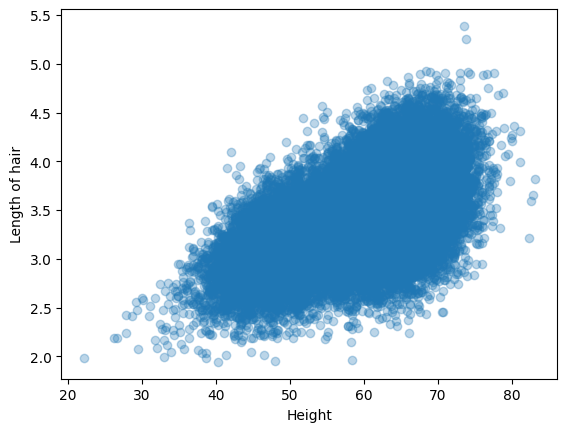

In [15]:
plt.scatter(df['height'], df['hairLength'], alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Length of hair')
plt.show();

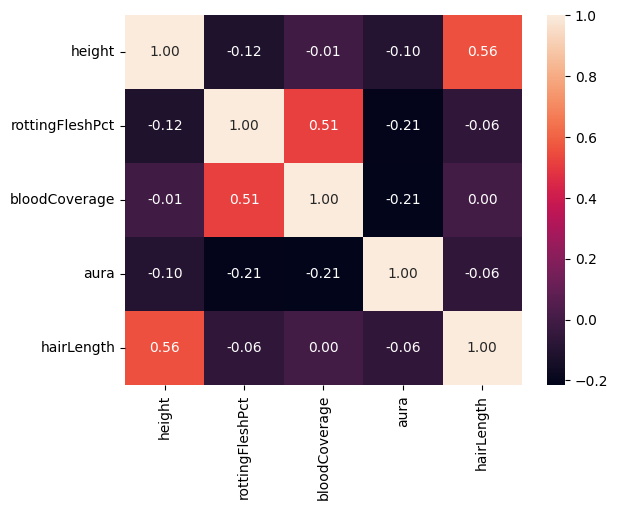

In [16]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

# **🎃DATA PREPR🧛CESSING🎃**

In [17]:
df.head(1)

,class,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,Zombie,61.624796,green,24.37,25.009,0.15388,3.331372


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

le.fit(df['class'].drop_duplicates())
df['class'] = le.transform(df['class'])

In [20]:
df = pd.get_dummies(df)

In [21]:
df.head(1)

,class,height,rottingFleshPct,bloodCoverage,aura,hairLength,color_green,color_grey,color_purple,color_white
0,4,61.624796,24.37,25.009,0.15388,3.331372,1,0,0,0


In [22]:
df['class'].value_counts()

4    14952
3     7432
0     5672
2     5667
1     3774
Name: class, dtype: int64

In [23]:
X, y = df.drop('class', axis=1), df['class']

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
print(X_train.shape)
print(y_train.shape)
print('='*60)
print(X_test.shape)
print(y_test.shape)

(26247, 9)
(26247,)
(11250, 9)
(11250,)


In [27]:
df.head(1)

,class,height,rottingFleshPct,bloodCoverage,aura,hairLength,color_green,color_grey,color_purple,color_white
0,4,61.624796,24.37,25.009,0.15388,3.331372,1,0,0,0


# **🎃MO👻EL PREDICTION🎃**

In [28]:
clf = LinearSVC(penalty='l1', dual=False, loss='squared_hinge')


In [29]:
clf.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1')

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [70]:
a = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8701333333333333

In [33]:
precision_score(y_test, y_pred, average='micro')

0.8701333333333333

In [34]:
recall_score(y_test, y_pred, average='micro')

0.8701333333333333

NOW LET'S CHECK IF tree OVERFITTED

In [35]:
y_pred_t = clf.predict(X_train)

In [36]:
accuracy_score(y_train, y_pred_t)

0.8614317826799254

In [37]:
precision_score(y_train, y_pred_t, average='micro')

0.8614317826799254

In [38]:
recall_score(y_train, y_pred_t, average='micro')

0.8614317826799254

# **G🎃🎃D, but not EN🎃UGH**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNeighborsClassifier?

In [41]:
clf1 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(10 ,150, 10),
    'weights': ['uniform', 'distance']
}

grid1 = GridSearchCV(clf1, param_grid, cv=5)
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 150, 10),
                         'weights': ['uniform', 'distance']})

In [42]:
clf1 = grid1.best_estimator_

In [71]:
y_pred1 = clf1.predict(X_test)
b = accuracy_score(y_test, y_pred1)
accuracy_score(y_test, y_pred1)

0.8796444444444445

# **M🕸RE!!!!!**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
clf2 = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(5, 10)
}

grid2 = GridSearchCV(clf2, param_grid, cv=5)
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 10)})

In [46]:
clf2 = grid2.best_estimator_

In [72]:
y_pred2 = clf2.predict(X_test)
c = accuracy_score(y_test, y_pred2)
accuracy_score(y_test, y_pred2)

0.9019555555555555

# **GRAND FINALE💀**

In [48]:
from sklearn.svm import SVC

In [49]:
SVC?

In [50]:
clf3 = SVC()

In [51]:
param_grid = {
    'C': range(1, 3, 1),
    'kernel': ['rbf', 'sigmoid']
}

In [52]:
grid3 = GridSearchCV(clf3, param_grid, cv=3)
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': range(1, 3), 'kernel': ['rbf', 'sigmoid']})

In [53]:
clf3 = SVC()
clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

In [73]:
d = accuracy_score(y_test, y_pred3)
accuracy_score(y_test, y_pred3)

0.8715555555555555

# **C😓NCLUSION**

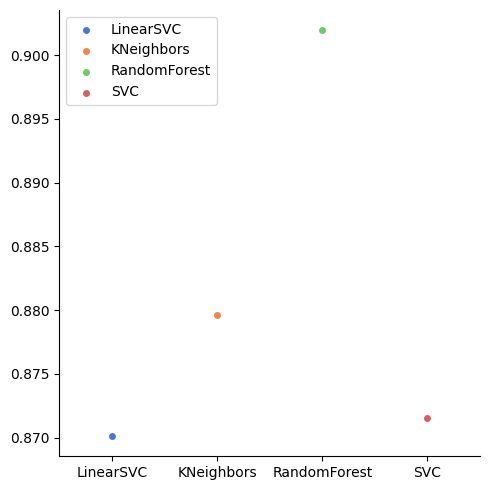

In [102]:
algos = ['LinearSVC', 'KNeighbors', 'RandomForest', 'SVC']
scores = [a, b, c, d]

sns.catplot(x=algos, y=scores,
            height=5, palette="muted", legend=True);
plt.legend(algos, loc='upper left')
plt.show();

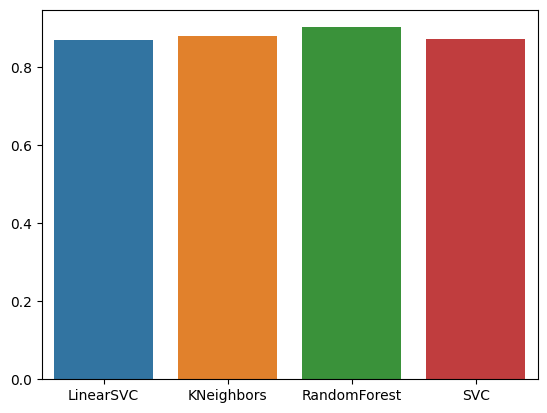

In [85]:
sns.barplot(x=algos, y=scores);

In [103]:
# RANDOM FOREST WON!!!

<img src='https://pbs.twimg.com/media/FhOrwVKXEAAURcL.jpg' width=33%><br>
**HAVE A SPOOKY HALLOWEEN**<br>
# **AND USE MY CODE TO SAVE YOUR LIFE🎃**